<a href="https://colab.research.google.com/github/PO05/Appflame-Test-Task/blob/main/test_task_2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

**Умова**
На різних сторінках великого маркетплейсу ми показали однакову рекламну видачу. Серед показаних рекламних повідомлень були як дженерал покази, які підходять усім, так і вузькоспецифічні. Наприклад, інструменти протезування.

Результати показів на кожній з сторінок ми загрегували в різні групи користувачів. Вважаємо, що користувачі з різними інтересами відвідували різні сторінки.
Тепер ми хочемо максимально згрупувати отримані нами групи в більші сегменти для покращення ефективності.

**Рішення** буде знайдене шляхом застосування алгоритму **K-means**, та задля ефективнішого його виконання, буде зменшене число змінних з 40 (CTR по кожному з 40 банерів) до оптимального числа за допомогою методу **PCA**.   

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Read and Transform Data

In [ ]:
data_path = 'data/CTR dataset - Sheet1.csv'
rename_columns = {
    'user_group': 'user_group',
    'banner': 'banner',
    'CTR': 'ctr',
}
data = pd.read_csv(data_path, converters={'CTR': lambda x: float(x[:-1])/100})
data = data.rename(columns=rename_columns)
print(f'data shape: {data.shape}\n')
print(f'unique values:\n{data.nunique()}')
data.head(10)

data shape: (1680, 3)

unique values:
user_group      42
banner          40
ctr           1658
dtype: int64


,user_group,banner,ctr
0,Group_28,banner_a,0.067935
1,Group_33,banner_ah,0.025597
2,Group_4,banner_ai,0.024822
3,Group_4,banner_p,0.036894
4,Group_8,banner_z,0.026998
5,Group_2,banner_e,0.058281
6,Group_31,banner_t,0.032304
7,Group_13,banner_n,0.037464
8,Group_40,banner_m,0.040878
9,Group_27,banner_w,0.030598


In [ ]:
# Transform data into table with @banner as variables for each row of Group
df = pd.pivot_table(data, index='user_group', columns='banner', values='ctr')
df

banner,banner_a,banner_aa,banner_ab,banner_ac,banner_ad,banner_ae,banner_af,banner_ag,banner_ah,banner_ai,...,banner_q,banner_r,banner_s,banner_t,banner_u,banner_v,banner_w,banner_x,banner_y,banner_z
user_group,,,,,,,,,,,,,,,,,,,,,
Group_1,0.067761,0.027119,0.026940,0.025819,0.026973,0.026413,0.024403,0.024559,0.025861,0.023659,...,0.036019,0.035140,0.032455,0.030769,0.031093,0.031422,0.029358,0.029951,0.029116,0.028313
Group_10,0.068591,0.026615,0.027362,0.026102,0.025773,0.026485,0.026180,0.024340,0.024884,0.025387,...,0.035315,0.034039,0.033487,0.033101,0.032421,0.031733,0.030325,0.030018,0.028209,0.028125
Group_11,0.066980,0.027397,0.027203,0.026260,0.026785,0.026422,0.025241,0.025615,0.024465,0.025577,...,0.035815,0.033081,0.033518,0.032712,0.030940,0.031008,0.028959,0.028253,0.028207,0.028373
Group_12,0.068026,0.028232,0.027657,0.026547,0.026875,0.026520,0.025329,0.025906,0.024563,0.025566,...,0.034451,0.034339,0.033063,0.032240,0.031699,0.030620,0.031103,0.029281,0.028178,0.028047
Group_13,0.071477,0.031840,0.027375,0.026185,0.024847,0.025828,0.028901,0.024466,0.025111,0.024539,...,0.041564,0.034943,0.032335,0.032614,0.032100,0.029671,0.030089,0.028037,0.028154,0.028717
Group_14,0.070255,0.027394,0.026252,0.026487,0.025293,0.024763,0.025759,0.025212,0.024392,0.024002,...,0.034884,0.035107,0.032492,0.033406,0.031786,0.029720,0.029200,0.028908,0.029644,0.027827
Group_15,0.068501,0.027611,0.028045,0.025327,0.025790,0.026291,0.024613,0.025708,0.024006,0.025337,...,0.036402,0.035284,0.033462,0.032417,0.031679,0.031663,0.029989,0.028476,0.027544,0.027660
Group_16,0.067840,0.028271,0.022952,0.026494,0.025825,0.026318,0.025984,0.024085,0.025023,0.020895,...,0.034192,0.033040,0.027332,0.033365,0.030331,0.029880,0.028715,0.028422,0.029005,0.028412
Group_17,0.070342,0.028022,0.027214,0.025764,0.026697,0.025258,0.021406,0.024831,0.025140,0.024235,...,0.034813,0.034641,0.032177,0.032936,0.030022,0.030619,0.030669,0.028345,0.027840,0.027279


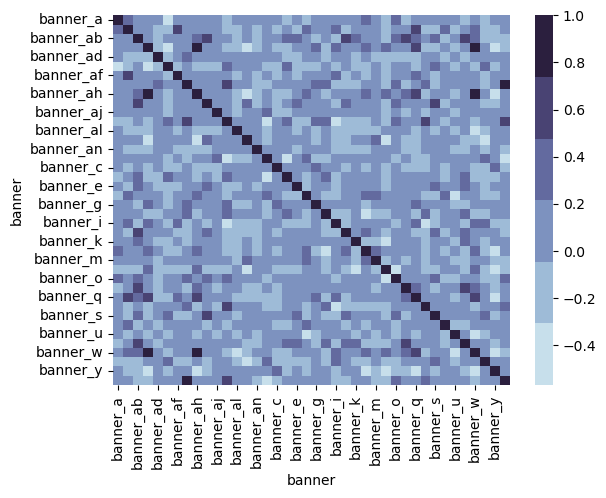

In [ ]:
# Correlation matrix heatmap
sns.heatmap(df.corr(), cmap=sns.color_palette("ch:s=.25,rot=-.25",))
plt.show()

# PCA
- Кількість головних компонент (нових змінних) буде вибрана така, що принаймні пояснюють в сумі ~80% відсотків дисперсії.
- Це буде видно з графіка залежності відсотка пояснюваної дисперсії в даних від кількості перших "головних компонент"

In [ ]:
# Transform data using PCA algorithm with 40 components
pca = PCA()
pca.fit(df)
X_transformed = pca.transform(df)

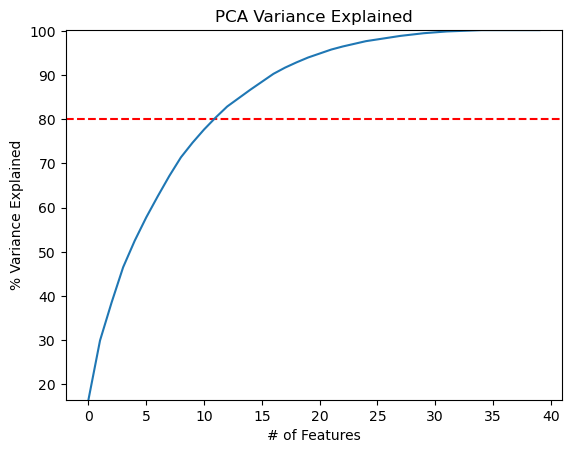

In [ ]:
# PCA ecplained variance vizualize
variance = pca.explained_variance_ratio_.round(3)*100
var = np.cumsum(variance)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var), max(var))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

In [ ]:
# PCA for dimension reduction
pca = PCA(n_components=10)
pca.fit(df)
df_transformed = pca.transform(df)


# KMeans Clustering

- Об'єднання груп на базі їх подібності можна здійснити шляхом їх групування в кластери, використовуючи один із популярних алгоритмів для задачі кластеризації - **K-means**.
- Для визначення оптимальної кількості кластерів, можна скористатися, так званим, методом "ліктя" (Elbow Method). За Elbow Method ми будуємо графік залежності суми квадратів відстаней між кожною точкою і найближчого до неї центроїда кластера від кількості кластерів в виконаному алгоритмі K-Means. Та кількість кластерів, після якої графік стає майже паралельним до осі Х і буде опитмальним числом  k.
- Для впевненості скористаємося також методом  **Silhouette Analysis**, побудувавши відповідний графік, подивившись на який визначимо за якої кількості кластерів в k-means коефіцієнт Silhoette Score буде відносно високим.

### Elbow Method and Silhoette Analysis

In [ ]:
X = df_transformed.copy()

In [ ]:
# Elbow method and Silhoette Analysis for finding of optimal num of clusters
range_n_clusters = [i for i in range(2,9+1)]
sum_of_squared_distances = []
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))

    sum_of_squared_distances.append(kmeans.inertia_)


C:\Users\Misha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Misha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Misha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Misha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

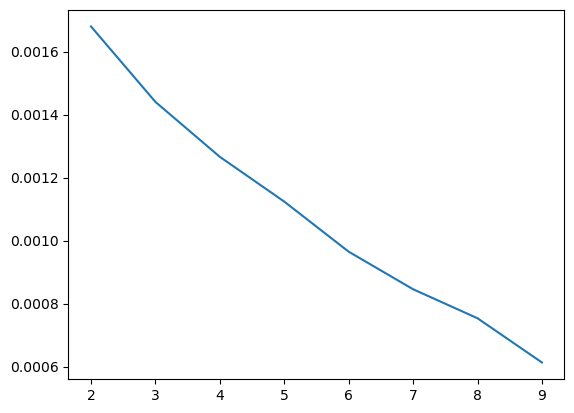

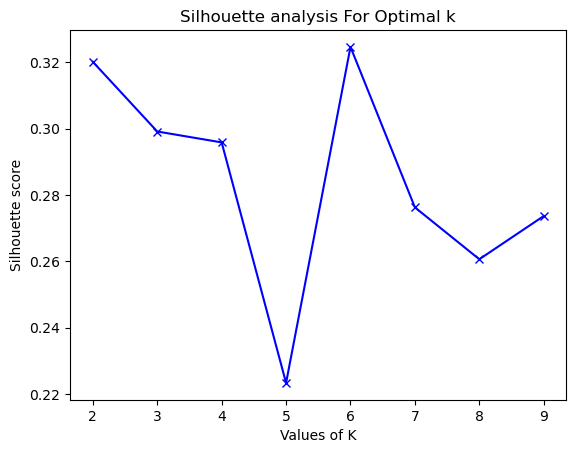

In [ ]:
# Elbow method and Silhouette Analysis Vizualize
plt.plot(range_n_clusters, sum_of_squared_distances)
plt.show()
plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

### Label each group of users

- Найоптимальнішим число кластерів схоже 6. Хоч за "методом ліктя" це не зовсім очевидно, то  Silhouette Analysis це підтверджує.

In [ ]:
# Perform Kmeans algorithm and label each Group if users
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
kmeans.fit(X)
cluster_labels = kmeans.labels_


C:\Users\Misha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Misha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# Num of groups in each cluster
clusters, num_of_groups = np.unique(cluster_labels, return_counts=True)
print(f'Num of Groups:\n{pd.Series(num_of_groups, clusters)}')

Num of Groups:
0    28
1     4
2     2
3     4
4     2
5     2
dtype: int64


### Vizualization of Clusters by PCA

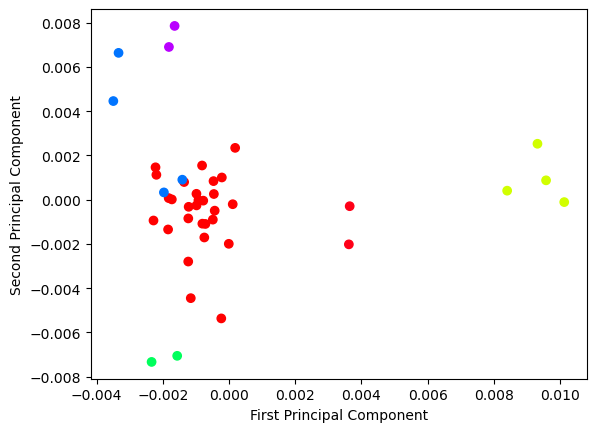

In [ ]:
# Vizualize Clusters
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=cluster_labels, cmap='hsv')
plt.show()

# Grouping lists

In [ ]:
list_of_new_segments = pd.Series(cluster_labels, index=df.index, name='cluster')
list_of_new_segments

user_group
Group_1     0
Group_10    0
Group_11    0
Group_12    0
Group_13    5
Group_14    0
Group_15    0
Group_16    3
Group_17    0
Group_18    0
Group_19    2
Group_2     1
Group_20    0
Group_21    0
Group_22    0
Group_23    1
Group_24    0
Group_25    2
Group_26    0
Group_27    0
Group_28    1
Group_29    1
Group_3     0
Group_30    0
Group_31    3
Group_32    0
Group_33    0
Group_34    0
Group_35    0
Group_36    0
Group_37    0
Group_38    4
Group_39    0
Group_4     5
Group_40    0
Group_41    0
Group_42    3
Group_5     3
Group_6     0
Group_7     0
Group_8     0
Group_9     4
Name: cluster, dtype: int32

In [ ]:
# Save result
list_of_new_segments.to_csv('new_groups_of_users.csv')

# Summary

- Щоб об'єднати потенційно схожі між собою групи був використаний алгоритм K-means
- Для ефективнішого його виконання, спочатку був використаний метод PCA для зменшення числа змінних
- Для визначення оптимального числа кластерів, були використані два методи - Elbow Method and Silhoette Analysis
- В результаті виявлено оптимальне число кластерів - 6
- Візуалізація кластеризованих груп користувачів у просторі перших двох головних компонент (PCA) показує відносно непоганий результат об'єднання/
